##This Notebook is related to the cleaning and exploration of the target variable file (POS). The goal of the challenge is to find surroundings to lead to high POS. This problem can thus be refrased as what are the differences between low and high POS performances hence a binary classification problem. As such we will explore the dataset with the goal of finding the timeframe that are as dichotomic as possible to give the model an easier time at making the distinction between location with low POS and location with high POS.

In [1]:
#We first import the file using the pandas library and make it as a dataframe
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
target = pd.read_csv('sales_granular.csv')

In [3]:
print(len(target), len(target.columns))


906 11937


There are 906 locations and 11937 features

In [4]:
target.head()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
4,10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the output above, we can see that the features corresponding to hourly timestamps, going from August 2015 to June 2017.

When exploring a dataset, several steps such as exploring the missing values, abnormalities, duplicates, values distributions have to be taken.
These steps don't need to have a specific order so I will first start by looking at duplicates.
If duplicates are present, I will remove them as I want each entry to be unique

In [2]:

ids = target.store_code
target[ids.isin(ids[ids.duplicated()])].sort_values("store_code")

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
32,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
33,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
34,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
35,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN


From the above output, we can see that the location with the store code 11028 has 4 duplicates. I will remove them now.


In [2]:
target = target.drop_duplicates(keep=False)
len(target)

902

The duplicates have been removed. Now let's look at the NAs, from the look of the previous outputs, all columns have NAs, however this NAs can be explained not by no data available but rather no POS at that time point, meaning 0. As such, NAs in this dataset can be filled with 0 which is what will be done now.

In [3]:
target2 = target.fillna(0, axis = 1)
target2.head()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,60.0,150.0,600.0,0.0,0.0,0.0
4,10085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's look at abnormalities, here data are all numerical and since they are Point of Sales, I would expect them to be either 0 or positive. So an abnormality would be negative numbers.

In [14]:
sum(n < 0 for n in target2.values.flatten())

170

170 values are negative, we don't know unfortunately why they were introduced and what mistake led to them being introduced. 

In [16]:
pd.set_option('display.max_rows', None)

pd.DataFrame({'min': target2.min(), 'idxmin':target2.idxmin()})

,idxmin,min
store_code,390,249.0
8/3/15 9:00,0,0.0
8/3/15 10:00,0,0.0
8/3/15 11:00,0,0.0
8/3/15 12:00,0,0.0
8/3/15 13:00,0,0.0
8/3/15 14:00,0,0.0
8/3/15 15:00,0,0.0
8/3/15 16:00,0,0.0
8/3/15 17:00,0,0.0


We don't know how they were introcuded so we will assume that mistakes were made with the sign and these values should be positive so we will make them positive.

In [4]:
#target2 = abs(target2)
target2[target2 < 0] = 0

Now We can have a look at how values are distributed and if outliers are present. For that I will split the timeframe by month. The reason comes from the fact that yearly might be to restrictive, we may have the bigger picture but might missed some underlying changes. On the other hand, a day or week stratification might actually be the opposite. Based on that, looking month by month may be a balanced view with respect to the other two.

In [5]:
target_2015 = target2[target2.columns[target2.columns.to_series().str.contains('[0-9]\/[0-9][0-9]\/15')]]
#only 1637 columns are from 2015
#lets now examine each month. A quick glance of the previous data shows us that only the last 5 months have data in 2015
target_2015_8 = target2[target2.columns[target2.columns.to_series().str.contains('8\/[0-9][0-9]\/15')]]
target_2015_9 = target2[target2.columns[target2.columns.to_series().str.contains('9\/[0-9][0-9]\/15')]]
target_2015_10 = target2[target2.columns[target2.columns.to_series().str.contains('10\/[0-9][0-9]\/15')]]
target_2015_11 = target2[target2.columns[target2.columns.to_series().str.contains('11\/[0-9][0-9]\/15')]]
target_2015_12 = target2[target2.columns[target2.columns.to_series().str.contains('12\/[0-9][0-9]\/15')]]

target_response_2015_8 = target_2015_8.sum(1)
target_response_2015_9 = target_2015_9.sum(1)
target_response_2015_10 = target_2015_10.sum(1)
target_response_2015_11 = target_2015_11.sum(1)
target_response_2015_12 = target_2015_12.sum(1)

#In this cell, we regex all month from 2015 and add each column to end up with the total POS per month for each location
#In the next cell, we will have a look at the values distribution by using boxplots.

{'boxes': [<matplotlib.lines.Line2D at 0x7f4e340139e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4e34028da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4e3403cb70>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4e3403c518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4e6b882358>,
  <matplotlib.lines.Line2D at 0x7f4e35a86fd0>]}

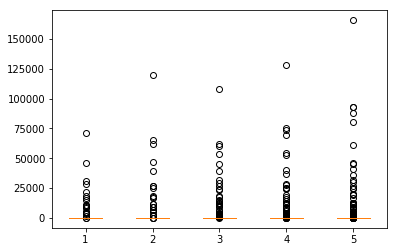

In [20]:
plt.boxplot ([target_response_2015_8, target_response_2015_9, target_response_2015_10, target_response_2015_11, target_response_2015_12])

As we can see, we cannot really do much because most of the values are actually outliers. We will try to have a look then using bar charts to have a better idea of the values distribution.

/home/turion91/Desktop/QALIgroupC/groupC/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


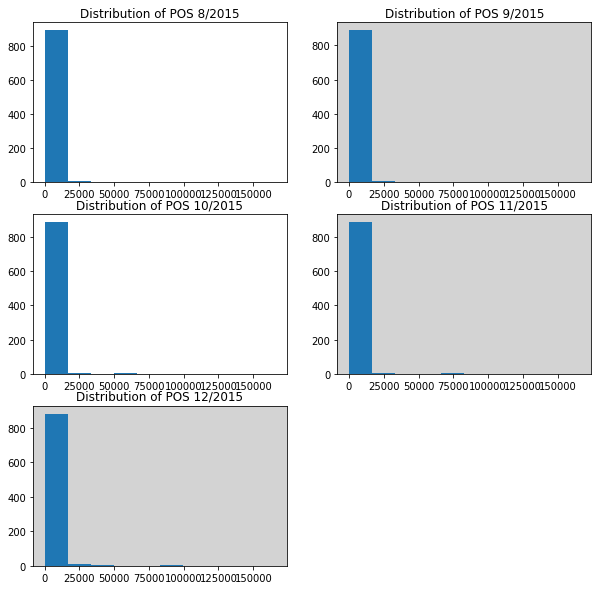

In [23]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
sub1 = fig.add_subplot(321)
sub1.set_title('Distribution of POS 8/2015')
sub1.hist(target_response_2015_8, range=(0,165750))
sub2 = fig.add_subplot(322, axisbg="lightgrey")
sub2.set_title('Distribution of POS 9/2015')
sub2.hist(target_response_2015_9, range=(0,165750))
sub3 = fig.add_subplot(323)
sub3.set_title('Distribution of POS 10/2015')
sub3.hist(target_response_2015_10, range=(0,165750))
sub4 = fig.add_subplot(324, axisbg="lightgrey")
sub4.set_title('Distribution of POS 11/2015')
sub4.hist(target_response_2015_11, range=(0,165750))
sub5 = fig.add_subplot(325, axisbg="lightgrey")
sub5.set_title('Distribution of POS 12/2015')
sub5.hist(target_response_2015_12, range=(0,165750))
plt.show()

This is not better, as most of the bins are between 0 and 20000 thousand POS, but we can see that we have outliers. 
Let's look now at the numerical description to have a better idea of the maximum and minimum.


In [43]:
pd.concat([target_response_2015_8.describe(), target_response_2015_9.describe(), target_response_2015_10.describe(),target_response_2015_11.describe(), target_response_2015_12.describe()], axis=1) 

,0,1,2,3,4
count,902.000000,902.000000,902.000000,902.000000,902.000000
mean,354.345898,597.039911,775.709534,947.993348,1275.299335
std,3438.920727,5723.453549,5862.260485,7127.583276,9139.544020
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,70980.000000,119760.000000,108420.000000,127920.000000,165750.000000


In the output above, we can that there are huge differences between values due to the high amount of outliers. A solution could then be to take the month with the lowest standard deviation, as the effect of outliers would be lessen. For that the first month of 2015 could be really usefull, as it has smallest standard deviation.
Now Let's have a look at 2016 and 2017, since the goal would be to eventually find the months maximizing the differences.

/home/turion91/Desktop/QALIgroupC/groupC/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


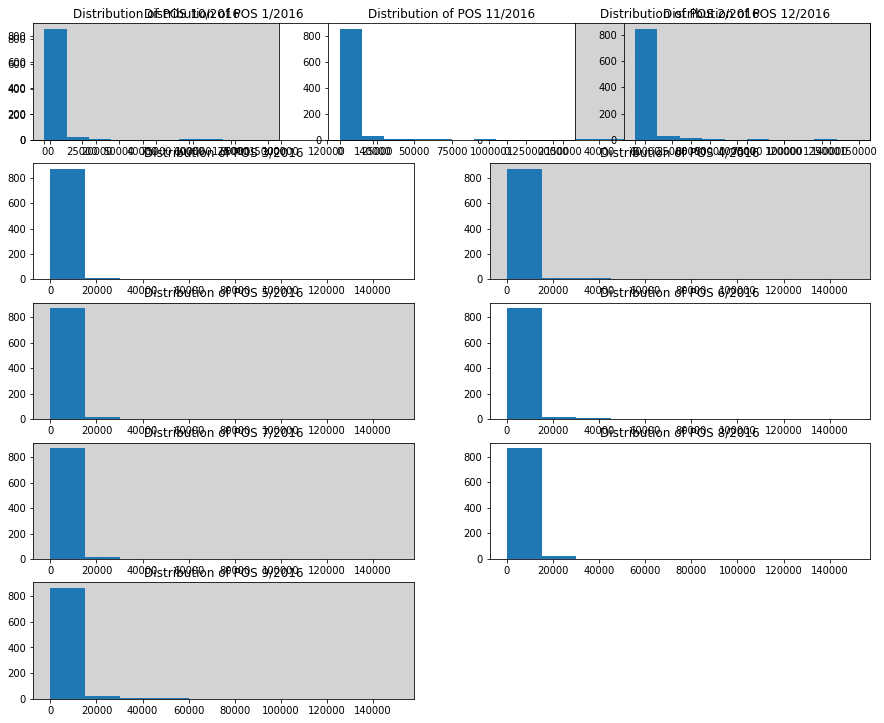

In [6]:
target_2016 = target2[target2.columns[target2.columns.to_series().str.contains('[0-9]\/[0-9][0-9]\/16')]]

target_2016_1 = target2[target2.columns[target2.columns.to_series().str.contains('^[1]{1}\/[0-9][0-9]\/16')]]
target_2016_2 = target2[target2.columns[target2.columns.to_series().str.contains('^2\/[0-9][0-9]\/16')]]
target_2016_3 = target2[target2.columns[target2.columns.to_series().str.contains('3\/[0-9][0-9]\/16')]]
target_2016_4 = target2[target2.columns[target2.columns.to_series().str.contains('4\/[0-9][0-9]\/16')]]
target_2016_5 = target2[target2.columns[target2.columns.to_series().str.contains('5\/[0-9][0-9]\/16')]]
target_2016_6 = target2[target2.columns[target2.columns.to_series().str.contains('6\/[0-9][0-9]\/16')]]
target_2016_7 = target2[target2.columns[target2.columns.to_series().str.contains('7\/[0-9][0-9]\/16')]]
target_2016_8 = target2[target2.columns[target2.columns.to_series().str.contains('8\/[0-9][0-9]\/16')]]
target_2016_9 = target2[target2.columns[target2.columns.to_series().str.contains('9\/[0-9][0-9]\/16')]]
target_2016_10 = target2[target2.columns[target2.columns.to_series().str.contains('10\/[0-9][0-9]\/16')]]
target_2016_11 = target2[target2.columns[target2.columns.to_series().str.contains('11\/[0-9][0-9]\/16')]]
target_2016_12 = target2[target2.columns[target2.columns.to_series().str.contains('12\/[0-9][0-9]\/16')]]

target_response_2016_1 = target_2016_1.sum(1)
target_response_2016_2 = target_2016_2.sum(1)
target_response_2016_3 = target_2016_3.sum(1)
target_response_2016_4 = target_2016_4.sum(1)
target_response_2016_5 = target_2016_5.sum(1)
target_response_2016_6 = target_2016_6.sum(1)
target_response_2016_7 = target_2016_7.sum(1)
target_response_2016_8 = target_2016_8.sum(1)
target_response_2016_9 = target_2016_9.sum(1)
target_response_2016_10 = target_2016_10.sum(1)
target_response_2016_11 = target_2016_11.sum(1)
target_response_2016_12 = target_2016_12.sum(1)

fig = plt.figure(figsize=(15, 15))
sub1 = fig.add_subplot(621)
sub1.set_title('Distribution of POS 1/2016')
sub1.hist(target_response_2016_1, range=(0,150000))
sub2 = fig.add_subplot(622, axisbg="lightgrey")
sub2.set_title('Distribution of POS 2/2016')
sub2.hist(target_response_2016_2, range=(0,150000))
sub3 = fig.add_subplot(623)
sub3.set_title('Distribution of POS 3/2016')
sub3.hist(target_response_2016_3, range=(0,150000))
sub4 = fig.add_subplot(624, axisbg="lightgrey")
sub4.set_title('Distribution of POS 4/2016')
sub4.hist(target_response_2016_4, range=(0,150000))
sub5 = fig.add_subplot(625, axisbg="lightgrey")
sub5.set_title('Distribution of POS 5/2016')
sub5.hist(target_response_2016_5, range=(0,150000))
sub6 = fig.add_subplot(626)
sub6.set_title('Distribution of POS 6/2016')
sub6.hist(target_response_2016_6, range=(0,150000))
sub7 = fig.add_subplot(627, axisbg="lightgrey")
sub7.set_title('Distribution of POS 7/2016')
sub7.hist(target_response_2016_7, range=(0,150000))
sub8 = fig.add_subplot(628)
sub8.set_title('Distribution of POS 8/2016')
sub8.hist(target_response_2016_8, range=(0,150000))
sub9 = fig.add_subplot(629, axisbg="lightgrey")
sub9.set_title('Distribution of POS 9/2016')
sub9.hist(target_response_2016_9, range=(0,150000))
sub10 = fig.add_subplot(631, axisbg="lightgrey")
sub10.set_title('Distribution of POS 10/2016')
sub10.hist(target_response_2016_10, range=(0,150000))
sub11 = fig.add_subplot(632)
sub11.set_title('Distribution of POS 11/2016')
sub11.hist(target_response_2016_11, range=(0,150000))
sub12 = fig.add_subplot(633, axisbg="lightgrey")
sub12.set_title('Distribution of POS 12/2016')
sub12.hist(target_response_2016_12, range=(0,150000))

plt.show()

/home/turion91/Desktop/QALIgroupC/groupC/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


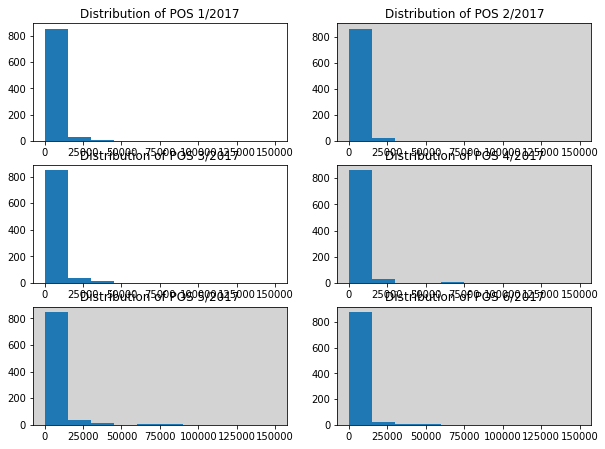

In [7]:
target_2017 = target2[target2.columns[target2.columns.to_series().str.contains('[0-9]\/[0-9][0-9]\/17')]]


target_2017_1 = target2[target2.columns[target2.columns.to_series().str.contains('1\/[0-9][0-9]\/17')]]
target_2017_2 = target2[target2.columns[target2.columns.to_series().str.contains('2\/[0-9][0-9]\/17')]]
target_2017_3 = target2[target2.columns[target2.columns.to_series().str.contains('3\/[0-9][0-9]\/17')]]
target_2017_4 = target2[target2.columns[target2.columns.to_series().str.contains('4\/[0-9][0-9]\/17')]]
target_2017_5 = target2[target2.columns[target2.columns.to_series().str.contains('5\/[0-9][0-9]\/17')]]
target_2017_6 = target2[target2.columns[target2.columns.to_series().str.contains('6\/[0-9][0-9]\/17')]]


target_response_2017_1 = target_2017_1.sum(1)
target_response_2017_2 = target_2017_2.sum(1)
target_response_2017_3 = target_2017_3.sum(1)
target_response_2017_4 = target_2017_4.sum(1)
target_response_2017_5 = target_2017_5.sum(1)
target_response_2017_6 = target_2017_6.sum(1)


fig = plt.figure(figsize=(10, 10))
sub1 = fig.add_subplot(421)
sub1.set_title('Distribution of POS 1/2017')
sub1.hist(target_response_2017_1, range=(0,150000))
sub2 = fig.add_subplot(422, axisbg="lightgrey")
sub2.set_title('Distribution of POS 2/2017')
sub2.hist(target_response_2017_2, range=(0,150000))
sub3 = fig.add_subplot(423)
sub3.set_title('Distribution of POS 3/2017')
sub3.hist(target_response_2017_3, range=(0,150000))
sub4 = fig.add_subplot(424, axisbg="lightgrey")
sub4.set_title('Distribution of POS 4/2017')
sub4.hist(target_response_2017_4, range=(0,150000))
sub5 = fig.add_subplot(425, axisbg="lightgrey")
sub5.set_title('Distribution of POS 5/2017')
sub5.hist(target_response_2017_5, range=(0,150000))
sub6 = fig.add_subplot(426, axisbg="lightgrey")
sub6.set_title('Distribution of POS 6/2017')
sub6.hist(target_response_2017_6, range=(0,150000))

plt.show()

This is a bit quick and dirty but we can see that 2016 and 2017 have similar distributions as 2015, with lots of outliers, so I expect the boxplot to be also similar, hence I will go directy to the numerical description.

In [28]:
pd.concat([target_response_2016_1.describe(), target_response_2016_2.describe(), target_response_2016_3.describe(), target_response_2016_4.describe(), target_response_2016_5.describe(), target_response_2016_6.describe(), target_response_2016_7.describe(), target_response_2016_8.describe(), target_response_2016_9.describe(), target_response_2016_10.describe(), target_response_2016_11.describe(), target_response_2016_12.describe()], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.00000,902.000000,902.000000,902.000000
mean,1261.662971,1360.875831,1696.962306,1661.940133,1997.228381,2076.186253,2166.286031,2271.286031,2445.59867,2677.250554,2858.747228,3597.239468
std,8639.226128,9051.575332,10931.816077,10085.886487,10764.912042,10439.688926,10148.916612,9918.041673,10255.81993,10756.098122,10612.620243,12649.857335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,60.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,135.000000,435.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,330.000000,442.50000,660.000000,990.000000,1620.000000
max,158820.000000,175440.000000,174810.000000,168780.000000,173940.000000,166500.000000,146850.000000,159840.000000,129120.00000,120630.000000,122670.000000,146700.000000


Based on the standard deviasions, the first month of 2016 seems really good.

In [29]:
pd.concat([target_response_2017_1.describe(), target_response_2017_2.describe(), target_response_2017_3.describe(), target_response_2017_4.describe(), target_response_2017_5.describe(), target_response_2017_6.describe()], axis=1)

,0,1,2,3,4,5
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,3428.747228,3168.891353,3824.700665,3337.915743,3941.241685,2301.884701
std,10976.659228,9674.663163,10209.284151,8325.854019,9643.946167,5268.610015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,180.000000,270.000000,270.000000,330.000000,240.000000
50%,600.000000,705.000000,930.000000,855.000000,1080.000000,720.000000
75%,1980.000000,2062.500000,2790.000000,2730.000000,3195.000000,2032.500000
max,149910.000000,134370.000000,107490.000000,83160.000000,115980.000000,57540.000000


Here, the last month of 2017 seems to be the best one in term of standard deviation.
Now what is left to do is concatenate and sum up these three month into one single dataframe.

In [8]:

target_response_2015_8_2016_1_2017_6 = pd.concat([target_response_2015_8, target_response_2016_1, target_response_2017_6], axis=1)
target_response_2015_8_2016_1_2017_6 = target_response_2015_8_2016_1_2017_6.sum(1)
target_response_2015_8_2016_1_2017_6 = pd.concat([target2.store_code, target_response_2015_8_2016_1_2017_6], axis=1)
target_response_2015_8_2016_1_2017_6.columns = ['store_code', 'POS_binary']
target_response_2015_8_2016_1_2017_6.to_csv('target_response_2015_8_2016_1_2017_6.csv')

In [32]:
target_response_2015_12_2016_12_2017_1.head()

,store_code,POS_binary
0,10055.0,3360.0
1,10077.0,60.0
2,10079.0,34770.0
3,10081.0,52140.0
4,10085.0,6210.0


The exploration of the target is done and has been saved as csv. I will not make the binary conversion yet because I want to wait after merging it with the exploratory variables. Once all the cleaning steps have been done on the merged dataset, I will proceed to binarize the response variable.